# CMSE 202 Final (Section 002 - Fall 2019)

<img src="https://imgs.xkcd.com/comics/extrapolating.png" width=400px>

The goal of this exam is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll practice setting up a GitHub repository, working with a new data set, developing models of that data using Python packages and finally recreating those models using your own programming skills. You should find that you have all of the skills necessary to complete this exam!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Using Anaconda, you should not have to install any packages to do the work.

In as much as it is possible, the exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Hint**: It is possible you are asked to do something you are not familiar with. That's why you have internet access. Do some smart searches and see what you can find! 

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However**: The use of any person-to-person communication software is absolutely not acceptable. If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

---
## Part 1: Setting up a repository for tracking changes (15 points)

Before you get too far along in the assignment, you need to set up a **private** GitHub repository that you will store this notebook in and track the changes as you make them. For this section you should:

1. Set up a new **private** Git repository on GitHub called "cmse202-final-< YourName >" where < YourName > is replaced with, you guessed it, your name.
2. Clone the repository onto your computer.
3. Move this notebook into that repository and then add it and commit it to the repository and push the changes to the remote repository (**Suggestion**: You may want save and close this notebook before you move to the repository and then reopen it after you move it to make sure that you're working with the right copy of the notebook.)
4. Add your TA as a Collaborator to your respository. As a reminder, your TA's username on GitHub is: **Luis-Polanco**

From this point on you will occasionally be asked to save the state of your notebook, commit the changes, and push it to your new repository.

**Note**: If you're struggling with getting the Git repository set up, you can always just work on the notebook as is and try to come back and figure out the repository component later. You may lose some points though since you won't have periodic commits as you make progress along the way, but it will be better than not working on the other parts of the exam!

## Part 2: Working with Example Data (25 points)

Abalone are a class of marine snails that create a shell of "nacre" of increasing thickness over the course of their lifetime. A very good indication of the age of a particular abalone is the number of "rings" of nacre that have been deposited in the creation of the shell. We are going to look at a data set that is used to estimate the number of rings of a particular abalone shell based on various other abalone characteristics.

In the D2L directory where this notebook can be found are two files. The first is `Dataset.data` which contains 4177 individual abalone measurements. The second is `Dataset.spec` which contains the labels for the 9 columns. Note a couple of things:
* The values in the data file are *space separated*. You can figure out how to load this data using pandas or any other tool
* The first column is categorical (non-numeric) data. You can ignore it going forward.
* The final column, the count of `rings`, is the dependent variable




In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

### Part 2.1  (13 points)

Load the data from the data file and provide the following concerning the `rings` data of the samples:
* the max
* the min
* the mean
* the median
* a histogram (using any tool you like) of the distribution of `rings` values

In [25]:
## your code here
data=pd.read_csv('Dataset.data',delimiter=' ')
data=data[1:]
rings=data['15']
rings=rings.values.tolist()


In [26]:
mean=np.mean(rings)
maxi=np.max(rings)
mini=np.min(rings)
median=np.median(rings)
print('The max is',maxi,'the min is',mini,'the mean is',mean,'the median is',median)

The max is 29 the min is 1 the mean is 9.933173652694611 the median is 9.0


Text(0.5, 1.0, 'No. of rings vs Frequency')

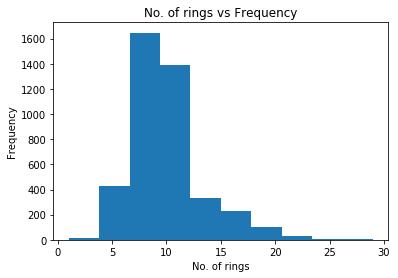

In [27]:
plt.hist(rings)
plt.ylabel('Frequency')
plt.xlabel('No. of rings')
plt.title('No. of rings vs Frequency')

### Part 2.2 (12 points)

Let's make a correlation matrix of the variables in the abalone dataset and plot it as a heat map

In [28]:
data
data=data.drop(['M'],axis=1)

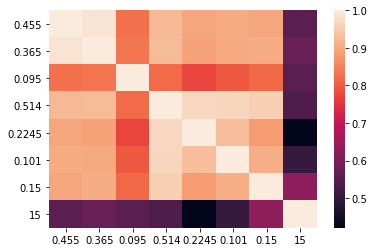

In [34]:
correlation_matrix=data.corr()
#np.corrcoef(data)
#np.histogram2d(correlation_matrix)
sns.heatmap(correlation_matrix,xticklabels=data.columns)


<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> **Time to push your changes to your github repository and then carry on**

## Part 3 (25 points)

Looking at our heatmap, please select the independent variable that has the best correlation with the dependent variable `rings`. Please **write in the cell below** that variable you will work with below.

The ring data doesn't seem to correlate that well with anything, however the thing it correlates the best with is the data in the column titled 0.15

Having selected an independent variable, let us do a linear regression using your selected variable (lets just call it `x`) and the `rings` variable (let's just call that `y`). While you can do as you wish, I would suggest working with various submodules of `sklearn`

### Part 3.1 (13 points)

Split the avaiable data into 4 sets: `x_train` and `x_test`, `y_train` and `y_test`. Make the test set 80% of the data and the test set 20%

In [35]:
x_variable=data['0.15']
x_variable=x_variable.values.tolist()

In [91]:
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics

In [92]:
## your code here
y=rings
x=x_variable

In [93]:
x_train, x_test, y_train, y_test =sklearn.model_selection.train_test_split(x, y, test_size=0.2)

Using the `x_train` and `y_train` data, do a linear regression fit and report the slope and intercept values

In [94]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [95]:
reg_model=sklearn.linear_model.LinearRegression()
r=reg_model.fit(x_train,y_train)
print('The slope is',r.coef_)
print('The intercept is',r.intercept_)

The slope is [[14.59393224]]
The intercept is [6.49519356]


### Part 3.2 (12 points)

- For the `x_test` data, use the linear regression model to create a prediction set, call it `y_predict`. 
- Using the `y_test` and `y_predict` values, report the `mean squared error` and the $r^{2}$ value (also called the `coefficient of determination`). 
- Plot the `x_test` and `y_test` data and the linear regression line

In [103]:
## your code here
y_predict=reg_model.predict(x_test)
mse=sklearn.metrics.mean_squared_error(y_test,y_predict)
print('The mean squared error is', mse)
r2=sklearn.metrics.r2_score(y_test,y_predict)
print('the r-squared score is',r2)

The mean squared error is 5.859171227153523
the r-squared score is 0.40206421579932816


<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> **Time to push your changes to your github repository and then carry on**

## Part 4 Doing it yourself (35 points)


### Part 4.1, Least Squares yourself (20 points)
Let's do some of that work ourselves to see if we can reproduce those results. We are going do the math for linear regression ourselves and see if our math agrees with the tools we used above. Below is the math. We'll use the same independent variable you chose above and the same training and testing sets.

Let's assume that the symbols $\bar{x}$ and $\bar{y}$ represent the means of those arrays and that `n` is the number of elements.

Here's the calculation for the slope
$$ slope = \frac {\sum_{i=1}^{n}{(x_i - \bar{x}) * (y_i - \bar{y}) } } {\sum_{i=1}^{n}{(x_i - \bar{x})^2}}$$

Here's the calculation for the intercept
$$ intercept = \bar{y} - slope*\bar{x} $$


Using the same independent variable and the same `x_train` and `y_train` as above, calculate the slope and intercept of the best fit least squares using the formula provided. Print:
- the slope
- the intercept
- plot the same `x_test`,`y_test` data you used above and plot the new regression line through that data using your **calculated slope and intercept**

In [ ]:
## your code here

### Part 4.2, Coefficient of Determination and Mean-Squared Error (15 points)

The coefficient of determination calculations are as follows:

Total sum of squares is:
$$ tsum = \sum_{i=1}^{n}{(y_i - \bar{y})^{2}} $$

Residual sum of squares is:
$$ residual = \sum_{i=1}^{n}{(y_i - y_{predicted})}^{2} $$

Mean-squared error is just $$ MSE = \frac{1}{n} * residual$$ or $$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - y_{predicted})}^{2} $$

The coefficient of determination is:
$$ cod = 1 - \frac{residual}{tsum} $$

Using the same `x-test` and `y-test` data you used above, develop a new `y_predict`  based on your **calculated slope and intercept** and provide the coefficient of determination and mean-squared error of your calculated regression model.

In [ ]:
## your code here

## You're Finished!

<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> Time to push your changes to your github repository when you finish


<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> Make sure you also turn in your completed notebook to the D2L assignment labeled `Final`. We will be checking github but grading the notebooks submitted to D2L.

Have a Happy Holiday Break

<img src="http://g33kingout.com/wp-content/uploads/2013/12/star-wars-Christmas-Card-may-your-find-the-droids.jpg" width=400px>
